In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/social_media_viral_content_dataset.csv")
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


In [ ]:
df.columns

Index(['post_id', 'platform', 'content_type', 'topic', 'language', 'region',
       'post_datetime', 'hashtags', 'views', 'likes', 'comments', 'shares',
       'engagement_rate', 'sentiment_score', 'is_viral'],
      dtype='object')

In [ ]:
target_column = "is_viral"


In [ ]:
label_encoders = {}

for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
svm_linear = SVC(kernel="linear", C=1)

svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)


In [ ]:
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Accuracy (Linear SVM): 0.985
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       123
           1       1.00      0.98      0.99       277

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline


In [ ]:
pipeline_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1))
])


In [ ]:
kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [ ]:
scores_linear = cross_val_score(
    pipeline_linear,
    X,
    y,
    cv=kfold,
    scoring="accuracy"
)


In [ ]:
print("SVM Linéaire")
print("Scores:", scores_linear)
print("Accuracy moyenne:", scores_linear.mean())

SVM Linéaire
Scores: [0.9775 0.99   0.9925 0.985  0.9875]
Accuracy moyenne: 0.9865


In [ ]:
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)


In [ ]:
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Accuracy (RBF SVM): 0.94
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.96      0.95      0.96       277

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400



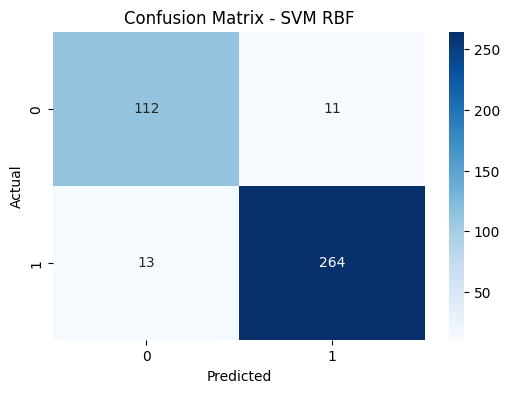

In [ ]:
cm = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM RBF")
plt.show()


In [ ]:
pipeline_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1, gamma="scale"))
])


In [ ]:
kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [ ]:
scores_rbf = cross_val_score(
    pipeline_rbf,
    X,
    y,
    cv=kfold,
    scoring="accuracy"
)


In [ ]:
print("\nSVM RBF")
print("Scores:", scores_rbf)
print("Accuracy moyenne:", scores_rbf.mean())


SVM RBF
Scores: [0.9325 0.95   0.9425 0.9575 0.9575]
Accuracy moyenne: 0.9480000000000001


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])


In [ ]:
param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10, 100]
}


In [ ]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(kernel='linear'))]),
             n_jobs=-1, param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
print("Meilleur C:", grid.best_params_)
print("Meilleure accuracy:", grid.best_score_)


Meilleur C: {'svm__C': 100}
Meilleure accuracy: 0.9925


In [ ]:
scoring_metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

for metric in scoring_metrics:
    scores = cross_val_score(
        pipeline,
        X,
        y,
        cv=5,
        scoring=metric
    )
    print(metric, scores.mean())


accuracy 0.984
precision_macro 0.9782289674897935
recall_macro 0.984326243160554
f1_macro 0.9810951257756816


In [ ]:
df = df.copy()

# Supprimer l’ancienne target si elle ne doit plus être utilisée
df = df.drop(columns=["is_viral"])


In [ ]:
df["engagement_score"] = (
    df["likes"] + df["comments"] + df["shares"]
)

df["engagement_level"] = pd.qcut(
    df["engagement_score"],
    q=3,
    labels=["Low", "Medium", "High"]
)


In [ ]:
target_column = "engagement_level"


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])


In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]



In [ ]:
leakage_columns = ["likes", "comments", "shares"]
X = X.drop(columns=leakage_columns)


In [ ]:
y.value_counts(normalize=True)


,proportion
engagement_level,
1,0.3335
0,0.3335
2,0.3330


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1, class_weight="balanced"))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=kfold,
    scoring="f1_macro"
)

print("F1-score moyen:", scores.mean())


F1-score moyen: 0.9845253578752466


In [ ]:
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Accuracy (Linear SVM): 0.985
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       123
           1       1.00      0.98      0.99       277

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1, class_weight="balanced"))
])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=kfold,
    scoring="f1_macro"
)

print("F1-score moyen:", scores.mean())


F1-score moyen: 0.9352252431768424


In [ ]:
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Accuracy (RBF SVM): 0.94
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       123
           1       0.96      0.95      0.96       277

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400

